# Métodos de validación, nos sirven para separar los datos de manera adecuada 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Hold out 

In [51]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4)

    clf = neighbors.KNeighborsClassifier(13)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,yhat))

Accuracy:  0.95
Accuracy:  0.95
Accuracy:  0.9666666666666667
Accuracy:  0.95
Accuracy:  0.9333333333333333
Accuracy:  0.95
Accuracy:  0.9666666666666667
Accuracy:  0.9833333333333333
Accuracy:  1.0
Accuracy:  0.9333333333333333


# Leave one out

In [31]:
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
yhat=[]
xx=0
for train_index, test_index in loo.split(X): #EL for va a realizar 150 iteraciones porq es un total de 150 patrones
    print(test_index) #Indice del patrón que se va a utilizar para la prueba
    print(train_index) #Indices de los patrones que se van a utilizar para el entrenamiento
    print(xx)
    xx+=1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_test)
    
    
    # ANtes de esta linea todo es relacionado al Leave one out 
    
    #CLASIFICADOR 3NN
    clf = neighbors.KNeighborsClassifier(13)
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.append(yhat1)

print(yhat)
print("Accuracy: ", accuracy_score(y,yhat)) #Aqui para obtener el accuracy tengo que compar yhat con tooodas las "y"

[0]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
0
[[5.1 3.5 1.4 0.2]]
[1]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90

array([2])

# Kfold cross validation

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

clf = neighbors.KNeighborsClassifier(13)
scores = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
print(scores)
print("*****"*10)
print("Accuracy: ", scores.mean())

[1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 1.         1.         1.        ]
**************************************************
Accuracy:  0.9800000000000001


In [25]:
list_accuracy=[]
for i in range(3,50,2):
    clf = neighbors.KNeighborsClassifier(i)
    scores = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
    list_accuracy.append(scores.mean())
print(list_accuracy)

[0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9666666666666666, 0.9733333333333334, 0.9666666666666666, 0.9666666666666666, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9333333333333333, 0.9333333333333333, 0.9400000000000001]


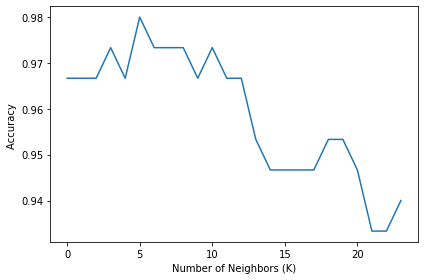

In [27]:
import matplotlib.pyplot as plt
plt.plot(list_accuracy)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout() #Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [33]:
clf.predict([np.array([1,1,1,1])])

array([0])

In [36]:
clf.predict([X_test[0]])

array([2])

In [35]:
X_test[0]

array([5.9, 3. , 5.1, 1.8])

In [37]:
y_test[0]

2